In [3]:
import numpy as np
import matplotlib.pylab as plt
from scipy.integrate import odeint

In [545]:
def f(a):
    n=4
    return (1/(1+a**n))
def Gly(y, t, params): 
    J0, k1,k2,k_g1,k_g2,k_p1,k_p2,k4,k5,k6,k7,k8,k9,kappa,phi,A,N= params 
    S1,S2,S3,S4,S5,S6,S6_ex,A3,N2= y 
    dydt= np.empty(len(y)) 
    v1= k1*S1*A3*f(A3)
    v2= k2*S2
    v3= (k_g1*k_p1*S3*(N-N2)*(A-A3)-k_g2*k_p2*S4*A3*N2)/(k_g2*N2+k_p1*(A-A3))
    v4= k4*S4*(A-A3)
    v5= k5*S5
    v6= k6*S6*N2
    v7= k7*A3
    v8= k8*S3*N2
    v9= k9*S6_ex
    dydt[0]= J0-v1
    dydt[1]= v1-v2
    dydt[2]= 2*v2-v3-v8
    dydt[3]= v3-v4
    dydt[4]= v4-v5
    dydt[5]= v5-v6-kappa*(S6-S6_ex)
    dydt[6]= phi*kappa*(S6-S6_ex)-v9
    dydt[7]= -2*v1+v3+v4-v7
    dydt[8]= v3 -v6 -v8
    return dydt 
def solveGly(S1,S2,S3,S4,S5,S6,S6_ex,A3,N2,k9):
    t1= np.linspace(0,3.2,200) #cannot run any longer. otherwise the program will collapse

    yi= np.array([S1,S2,S3,S4,S5,S6,S6_ex,A3,N2]) 

    params= np.array([50,550,9.8,323.8,57823.1,76411.1,23.7,80,9.7,2000,28,85.7,k9,375,0.1,4,1]) 

    y1= odeint(Gly, yi, t1, args= (params,))
    return y1

In [546]:
solveGly(2,2,6,1,9,1,1,1,1,2)[:,1]

array([ 2.        ,  3.02007509,  2.81043233,  2.730392  ,  2.7590251 ,
        2.89301613,  3.17633748,  4.00601616,  5.60786731,  6.03246208,
        5.63590201,  5.03872964,  4.54436274,  4.19265048,  3.9716442 ,
        3.86259341,  3.8531643 ,  3.9431946 ,  4.15812437,  4.62267915,
        6.42397334,  6.76089585,  6.10457849,  5.40526181,  4.85929999,
        4.46913369,  4.20884668,  4.05450254,  3.98765022,  3.99588492,
        4.07394339,  4.22702752,  4.48164146,  4.94077821,  6.78648518,
        7.23109865,  6.53738149,  5.76724969,  5.1616749 ,  4.72027383,
        4.41468146,  4.21902488,  4.11265347,  4.08013993,  4.11134451,
        4.20215274,  4.35681304,  4.59494068,  4.98031546,  6.1146162 ,
        7.4094562 ,  6.91495651,  6.09150521,  5.41978989,  4.92081844,
        4.56717149,  4.33126049,  4.19055222,  4.12764809,  4.13012338,
        4.19074878,  4.3085828 ,  4.49213534,  4.76924947,  5.23642562,
        7.06020967,  7.44848879,  6.68588448,  5.8937409 ,  5.27

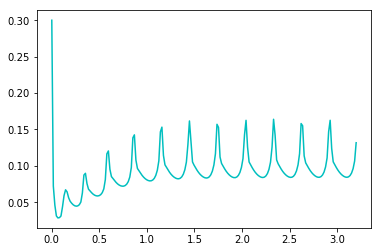

In [552]:
x=np.linspace(0,3.2,200)
plt.figure()
#plt.plot(x,solveGly(2,2,6,1,9,1,1,1,0.3,1)[:,7],'b')
plt.plot(x,solveGly(2,2,6,1,9,1,1,1,0.3,1.1)[:,8],'c')
plt.show()

In [564]:
maxsteady=[]
minsteady=[]
for k9 in np.linspace(1,10,100):
    maxsteady+=[np.max(solveGly(2,2,6,1,9,1,1,1,1,k9)[:,8][70:])]
    minsteady+=[np.min(solveGly(2,2,6,1,9,1,1,1,1,k9)[:,8][60:])]
print(maxsteady)

[0.15120595633015255, 0.16430636228734161, 0.17054139602144949, 0.1761999499014916, 0.18194080073341215, 0.18585483679479606, 0.1918932034845342, 0.19687906652024059, 0.20152700334925416, 0.20570620537863099, 0.20983137161812487, 0.21440230164886367, 0.21784276595200208, 0.22193026858569803, 0.22443288738328016, 0.22933469217439606, 0.23307342618839466, 0.23587181159562445, 0.23821939622931557, 0.24244733986607669, 0.24555753216374651, 0.24816073090392349, 0.25156494281189168, 0.25465984608938608, 0.2570909476884321, 0.26032074227432472, 0.26209869277802339, 0.26438789031860166, 0.26770091989762596, 0.26943790353063007, 0.265823344030158, 0.27440316589643993, 0.27729397353142426, 0.27852748704028918, 0.28103914490118143, 0.28350782308682504, 0.28526648997664583, 0.28776333134493987, 0.28884481874561108, 0.29085572233738372, 0.29306484387748694, 0.295394471466289, 0.29697942624941059, 0.29825735094573785, 0.30005809408279782, 0.30150262402743311, 0.30361626152289878, 0.30596085097658121

In [571]:
steady=[]
for k9 in np.linspace(0,1,100):
    steady+=[np.max(solveGly(2,2,6,1,9,1,1,1,1,k9)[:,8][-1])]
print(steady)

[0.039693480044633002, 0.040478130168184454, 0.041268615820122957, 0.042064591453849963, 0.042865703660631277, 0.043671591823409517, 0.044481885839524414, 0.045296210090911303, 0.046114182702181275, 0.04693541456767171, 0.047759511727641986, 0.048586071070277265, 0.049414687628037669, 0.050244948834534543, 0.051076430111562564, 0.051908698580596248, 0.052741311113949058, 0.053573799175913601, 0.054405670688266121, 0.055236395332490168, 0.056065385663960556, 0.056891962417476336, 0.057715307198469415, 0.058534372354045551, 0.059347710835753471, 0.060153113354135042, 0.060946858280574834, 0.06172187552829269, 0.062464698532056648, 0.063179792888154354, 0.063950604548919474, 0.064754097546188924, 0.065561698981753527, 0.066368187294706477, 0.067172157554717213, 0.067973003135682206, 0.068770357661901177, 0.069563962170074142, 0.070353604619198803, 0.071139109088853486, 0.071920324716793008, 0.072697107469175862, 0.073469337568085283, 0.074236903736363755, 0.074999709353566396, 0.075757660

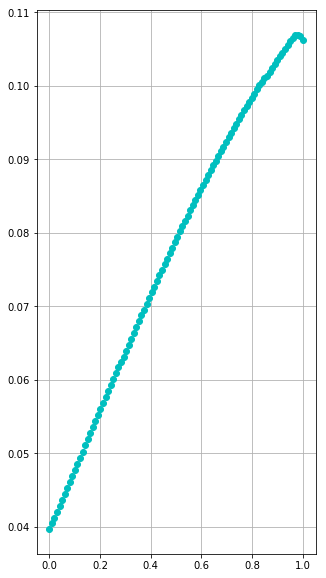

In [574]:
k9 = np.linspace(0,1,100)
plt.figure(figsize=(5,10))
plt.plot(k9,steady,'co')
plt.grid(True)
plt.show()

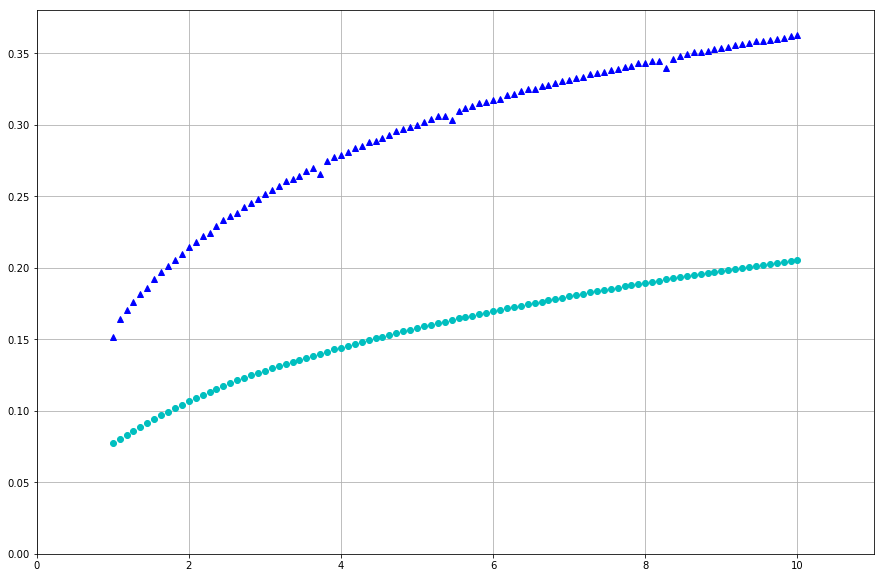

In [570]:
k9 = np.linspace(1,10,100)
plt.figure(figsize=(15,10))
plt.plot(k9,minsteady,'co')
plt.plot(k9,maxsteady,'b^')
plt.xlim(0,11)
plt.ylim(0,0.38)
plt.grid(True)
plt.show()

In [382]:
def f(a):
    n=4
    return (1/(1+a**n))
def Gly2(y, t, params): 
    J0, k1,k2,k_g1,k_g2,k_p1,k_p2,k4,k5,k6,k7,k8,k9,kappa,phi,A,N= params 
    S1,S2,S3,S4,S5,S6,S6_ex,A3,N2= y 
    v1= k1*S1*A3*f(A3)
    v2= k2*S2
    v3= (k_g1*k_g2*S3*(N-N2)*(A-A3)-k_g2*k_p2*S4*A3*N2)/(k_g2*N2+k_p1*(A-A3))
    v4= k4*S4*(A-A3)
    v5= k5*S5
    v6= k6*S6*N2
    v7= k7*A3
    v8= k8*S3*N2
    v9= k9*S6_ex
    dydt= np.empty(len(y)) 
    dydt[0]= J0-k1*S1*A3*f(A3)
    dydt[1]= k1*S1*A3*f(A3)-k2*S2
    dydt[2]= 2*k2*S2-(k_g1*k_p1*S3*(N-N2)*(A-A3)-k_g2*k_p2*S4*A3*N2)/(k_g2*N2+k_p1*(A-A3))-k8*S3*N2
    dydt[3]=(k_g1*k_g2*S3*(N-N2)*(A-A3)-k_g2*k_p1*S4*A3*N2)/(k_g2*N2+k_p1*(A-A3))-k4*S4*(A-A3)
    dydt[4]= k4*S4*(A-A3)-k5*S5
    dydt[5]= k5*S5-k6*S6*N2-kappa*(S6-S6_ex)
    dydt[6]= phi*kappa*(S6-S6_ex)-k9*S6_ex
    dydt[7]= -2*k1*S1*A3*f(A3)+(k_g1*k_p1*S3*(N-N2)*(A-A3)-k_g2*k_p2*S4*A3*N2)/(k_g2*N2+k_p1*(A-A3))+k4*S4*(A-A3)-k7*A3
    dydt[8]=(k_g1*k_p1*S3*(N-N2)*(A-A3)-k_g2*k_p2*S4*A3*N2)/(k_g2*N2+k_p1*(A-A3)) -k6*S6*N2 -k8*S3*N2
    return dydt 
def solveGly2(S1,S2,S3,S4,S5,S6,S6_ex,A3,N2,k9):
    t1= np.linspace(0, 200,200) 

    yi= np.array([S1,S2,S3,S4,S5,S6,S6_ex,A3,N2]) 

    params= np.array([50,550,9.8,323.8,57823.1,76411.1,23.7,80,9.7,2000,28,85.7,k9,375,0.1,4,1]) 

    y1= odeint(Gly, yi, t1, args= (params,))
    return y1